# Algorithmic Folding - Winter Semester 2022/2023 -In-Depth Homework Assignment

## Key Tasks
1. create facet path
2. unfold triangles based on facet path
3. test limits/examples

### Imports

In [45]:
import numpy as np
import networkx as nx

## Spanning Tree


In [46]:
faces = [[21, 22, 23],
        [22, 23, 24],
         [25, 22, 24],
         [23, 24, 26],  
         ]


spanning_tree = nx.Graph()
spanning_tree.add_edges_from([(0, 1), (1, 2),(1,3)])


In [47]:
tree_0 = spanning_tree.copy()
tree_1 = spanning_tree.copy()

level_array = np.zeros(len(faces))

Graph with 4 nodes and 3 edges


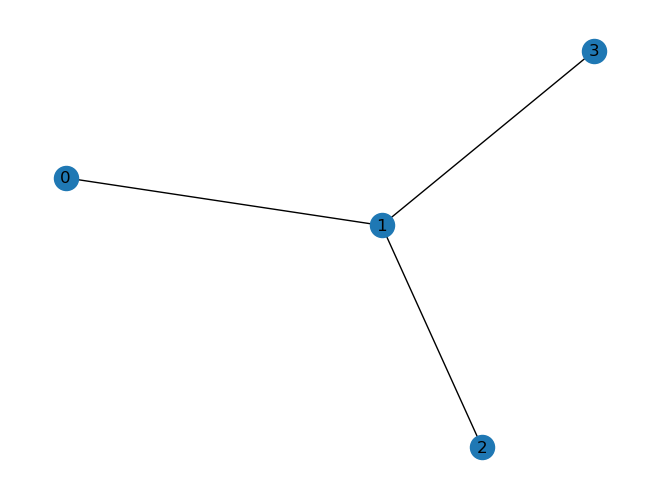

In [48]:
nx.draw(spanning_tree, with_labels = True)
print(tree_0)
 

## Facet Path

In [49]:
iter = 1
while tree_1.number_of_nodes()>=1:
    print("iteration",iter)
    print(tree_0.number_of_nodes(), tree_1.number_of_nodes())
    for node_id in list(tree_0.nodes):
        print("node",node_id, "weight",tree_0.degree[node_id])
        if tree_0.degree[node_id] == 1 or tree_0.degree[node_id] == 0:
            tree_1.remove_node(node_id)
            level_array[node_id] = iter
    tree_0 = tree_1.copy()
    iter += 1
    


iteration 1
4 4
node 0 weight 1
node 1 weight 3
node 2 weight 1
node 3 weight 1
iteration 2
1 1
node 1 weight 0


In [50]:
print(level_array)

[1. 2. 1. 1.]


In [51]:
facet_graph = nx.Graph()
even = 2

for even in range(2, int(max(level_array))+1,2):
    for face_id in range(len(level_array)):
        if level_array[face_id] == even:
            neighbours = list(spanning_tree.adj[face_id])
            relevant_neighbours = [face for face in neighbours if level_array[face] == even-1]
            if len(relevant_neighbours) == 1:
                    common_vertices = np.intersect1d(faces[face_id], faces[relevant_neighbours[0]])
                    print(common_vertices)
                    facet_graph.add_edge(face_id, common_vertices[0])
                    facet_graph.add_edge(face_id, common_vertices[1])
                    facet_graph.add_edge(relevant_neighbours[0], common_vertices[0])
                    facet_graph.add_edge(relevant_neighbours[0], common_vertices[1])
            elif len(relevant_neighbours) == 2:
                common_vertices_0 = np.intersect1d(faces[face_id], faces[relevant_neighbours[0]])
                common_vertices_1 = np.intersect1d(faces[face_id], faces[relevant_neighbours[1]])
                common_vertex = np.intersect1d(common_vertices_0, common_vertices_1)
                common_vertices_0 = np.setdiff1d(common_vertices_0, common_vertex)
                common_vertices_1 = np.setdiff1d(common_vertices_1, common_vertex)


                facet_graph.add_edge(face_id, common_vertices_0[0])
                facet_graph.add_edge(face_id, common_vertices_1[0])

                facet_graph.add_edge(common_vertices_0[0], relevant_neighbours[0])
                facet_graph.add_edge(common_vertices_1[0], relevant_neighbours[1])

                facet_graph.add_edge(relevant_neighbours[0], common_vertex[0])
                facet_graph.add_edge(relevant_neighbours[1], common_vertex[0])

            elif len(relevant_neighbours) == 3:
                start_face = relevant_neighbours[0]
                common_start = np.intersect1d(faces[start_face], faces[face_id])
                facet_graph.add_edge(start_face, common_start[0])

                facet_graph.add_edge(common_start[0], face_id)
                facet_graph.add_edge(face_id, common_start[1])

                if common_start[1] in faces[relevant_neighbours[1]]:
                    second_face = relevant_neighbours[1]
                    
                    last_face = relevant_neighbours[2]
                else:
                    second_face = relevant_neighbours[2]
                    last_face = relevant_neighbours[1]

                last_vertex = np.intersect1d(faces[second_face], faces[last_face])[0]

                facet_graph.add_edge(common_start[1], second_face)
                facet_graph.add_edge(second_face, last_vertex)
                facet_graph.add_edge(last_vertex, last_face)



In [52]:
for face in range(len(faces)-1):
    neighbour_nodes = list(spanning_tree.adj[face])
    for adj_face in neighbour_nodes:
        if(nx.has_path(facet_graph, face, adj_face)) is False:
            common_vertices = np.intersect1d(faces[face], faces[adj_face])

            if facet_graph.has_edge(face, common_vertices[0]):
                facet_graph.remove_edge(face, common_vertices[0])
            else:
                facet_graph.add_edge(face, common_vertices[0])
            if facet_graph.has_edge(face, common_vertices[1]):
                facet_graph.remove_edge(face, common_vertices[1])
            else:
                facet_graph.add_edge(face, common_vertices[1])

            if facet_graph.has_edge(adj_face, common_vertices[0]):
                facet_graph.remove_edge(adj_face, common_vertices[0])
            else:
                facet_graph.add_edge(adj_face, common_vertices[0])
            if facet_graph.has_edge(adj_face, common_vertices[1]):
                facet_graph.remove_edge(adj_face, common_vertices[1])
            else:
                facet_graph.add_edge(adj_face, common_vertices[1])


NetworkXError: G is not Eulerian.

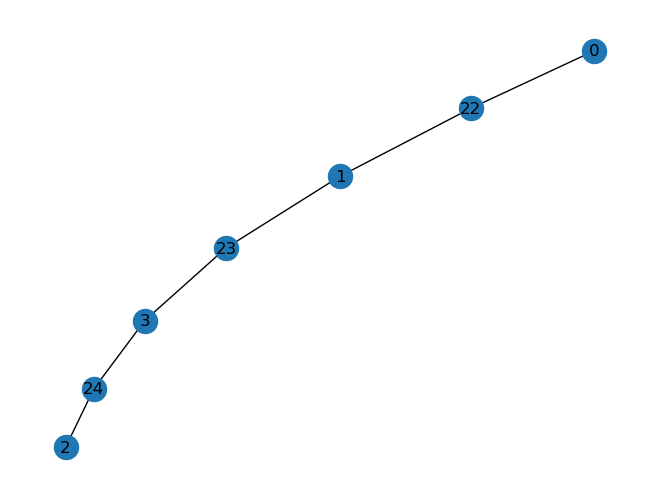

In [53]:
nx.draw(facet_graph, with_labels = True)
print(list(nx.eulerian_circuit(facet_graph)))